#**PART 1: DATA PREPROCESSING**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#**LOAD THE DATASETS**

In [ ]:
data = pd.read_csv('/content/Netflix_Userbase.csv')
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


#**MISSING VALUES**

In [ ]:
df_dummies = pd.get_dummies(data, drop_first = True)
df_dummies.isna().sum()

User ID                       0
Monthly Revenue               0
Age                           0
Subscription Type_Premium     0
Subscription Type_Standard    0
                             ..
Country_United States         0
Gender_Male                   0
Device_Smart TV               0
Device_Smartphone             0
Device_Tablet                 0
Length: 342, dtype: int64

#**ENCODE CATEGORICAL VARIABLES**

In [ ]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Subscription Type','Device','Gender','Plan Duration','Country'])

#**FEATURE SELECTION**

In [ ]:
X = data_encoded.drop('Monthly Revenue', axis=1)
y = data_encoded['Monthly Revenue']
print(data.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


#**PART 2 EXPLORATORY DATA ANALYSIS(EDA)**

#**DESCRIPTIVE STATISTICS**

In [ ]:
print(data.describe())

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


#**VISUALIZATIONS**


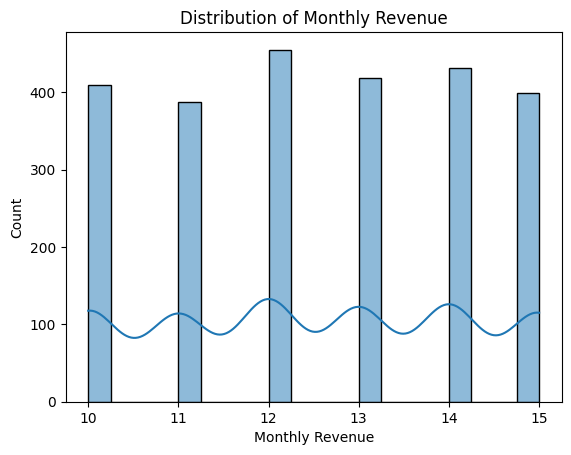

In [ ]:
sns.histplot(data['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.show()

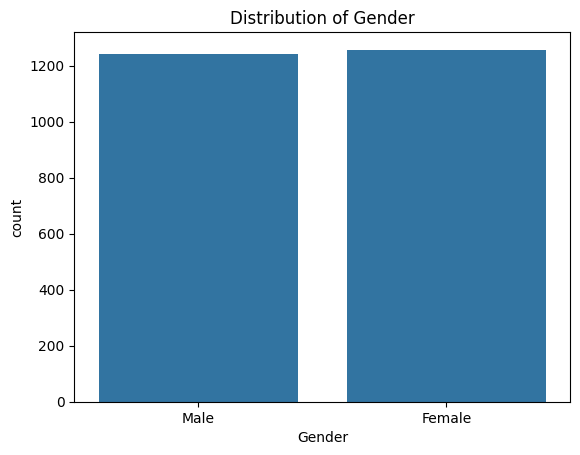

In [ ]:
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

#**PART 3 LINEAR REGRESSION MODEL (PREDICTING MONTHLY REVENUE)**

#**SPLIT THE DATA**

In [ ]:
X = data_encoded.drop(['Monthly Revenue','Join Date', 'Last Payment Date'], axis=1)
y = data_encoded['Monthly Revenue']

data_encoded.head()


,User ID,Monthly Revenue,Join Date,Last Payment Date,Age,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,...,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States
0,1,10,15-01-22,10-06-23,28,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,15,05-09-21,22-06-23,35,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,12,28-02-23,27-06-23,42,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4,12,10-07-22,26-06-23,51,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,5,10,01-05-23,28-06-23,33,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(data.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


#**MODEL EVALUATION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 2.8207741820491647
Root Mean Squared Error: 1.6795160559069284
R-squared: -0.02122189407447106


#**PART 4: LOGISTIC REGRESSION MODEL (PREDICTING CUSTOMER FEEDBACK)**

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit (X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred_log = model_logistic.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,Y_pred_log)
conf_matrix = confusion_matrix(y_test,Y_pred_log)
class_report = classification_report(y_test, Y_pred_log)

print(f'Accuracy : {accuracy}')
print(f'Confusion Matrix : {conf_matrix}')
print(f'Class Report :\n {class_report}')

Accuracy : 0.176
Confusion Matrix : [[ 9 21 22 13  8 12]
 [12 10 29 13  9  6]
 [13 11 32 15 13  9]
 [15 17 31  9 13  3]
 [11 11 35  7 15  6]
 [ 9 10 19  5 14 13]]
Class Report :
               precision    recall  f1-score   support

          10       0.13      0.11      0.12        85
          11       0.12      0.13      0.13        79
          12       0.19      0.34      0.25        93
          13       0.15      0.10      0.12        88
          14       0.21      0.18      0.19        85
          15       0.27      0.19      0.22        70

    accuracy                           0.18       500
   macro avg       0.18      0.17      0.17       500
weighted avg       0.18      0.18      0.17       500

